In [1]:
# import python libraries

# data analysis
import pandas as pd 
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn utilities
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from catboost import CatBoostRegressor

# Data Analysis

In [2]:
train = pd.read_csv('HPAR/train.csv')
test = pd.read_csv('HPAR/test.csv')

## Numerical Data

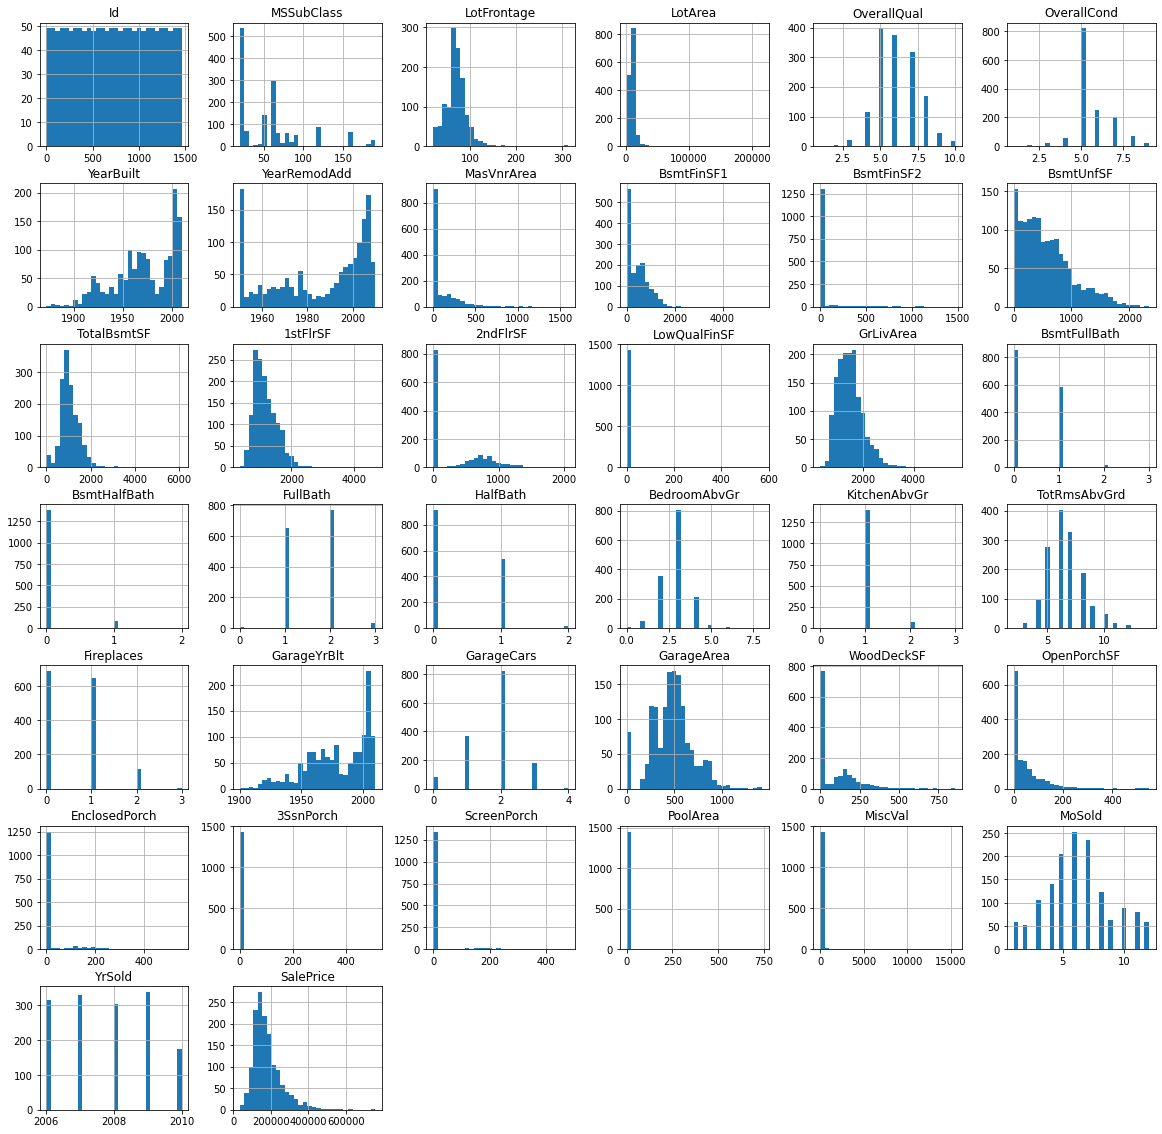

In [3]:
train_num = train.select_dtypes(exclude=['object'])
train_num.hist(figsize=(20, 20), bins=30);

Here we see that some features have very low density therefore we can don't use 'BsmtFinSf2', 'LowQualFinSF', 'LowQualFinSF', 'BdmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea' and 'MiscVal'.

In [4]:
train_num.drop(['Id','BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'], axis=1, inplace=True)

## Categorical Data

In [5]:
train_cat = train.select_dtypes(include=['object'])

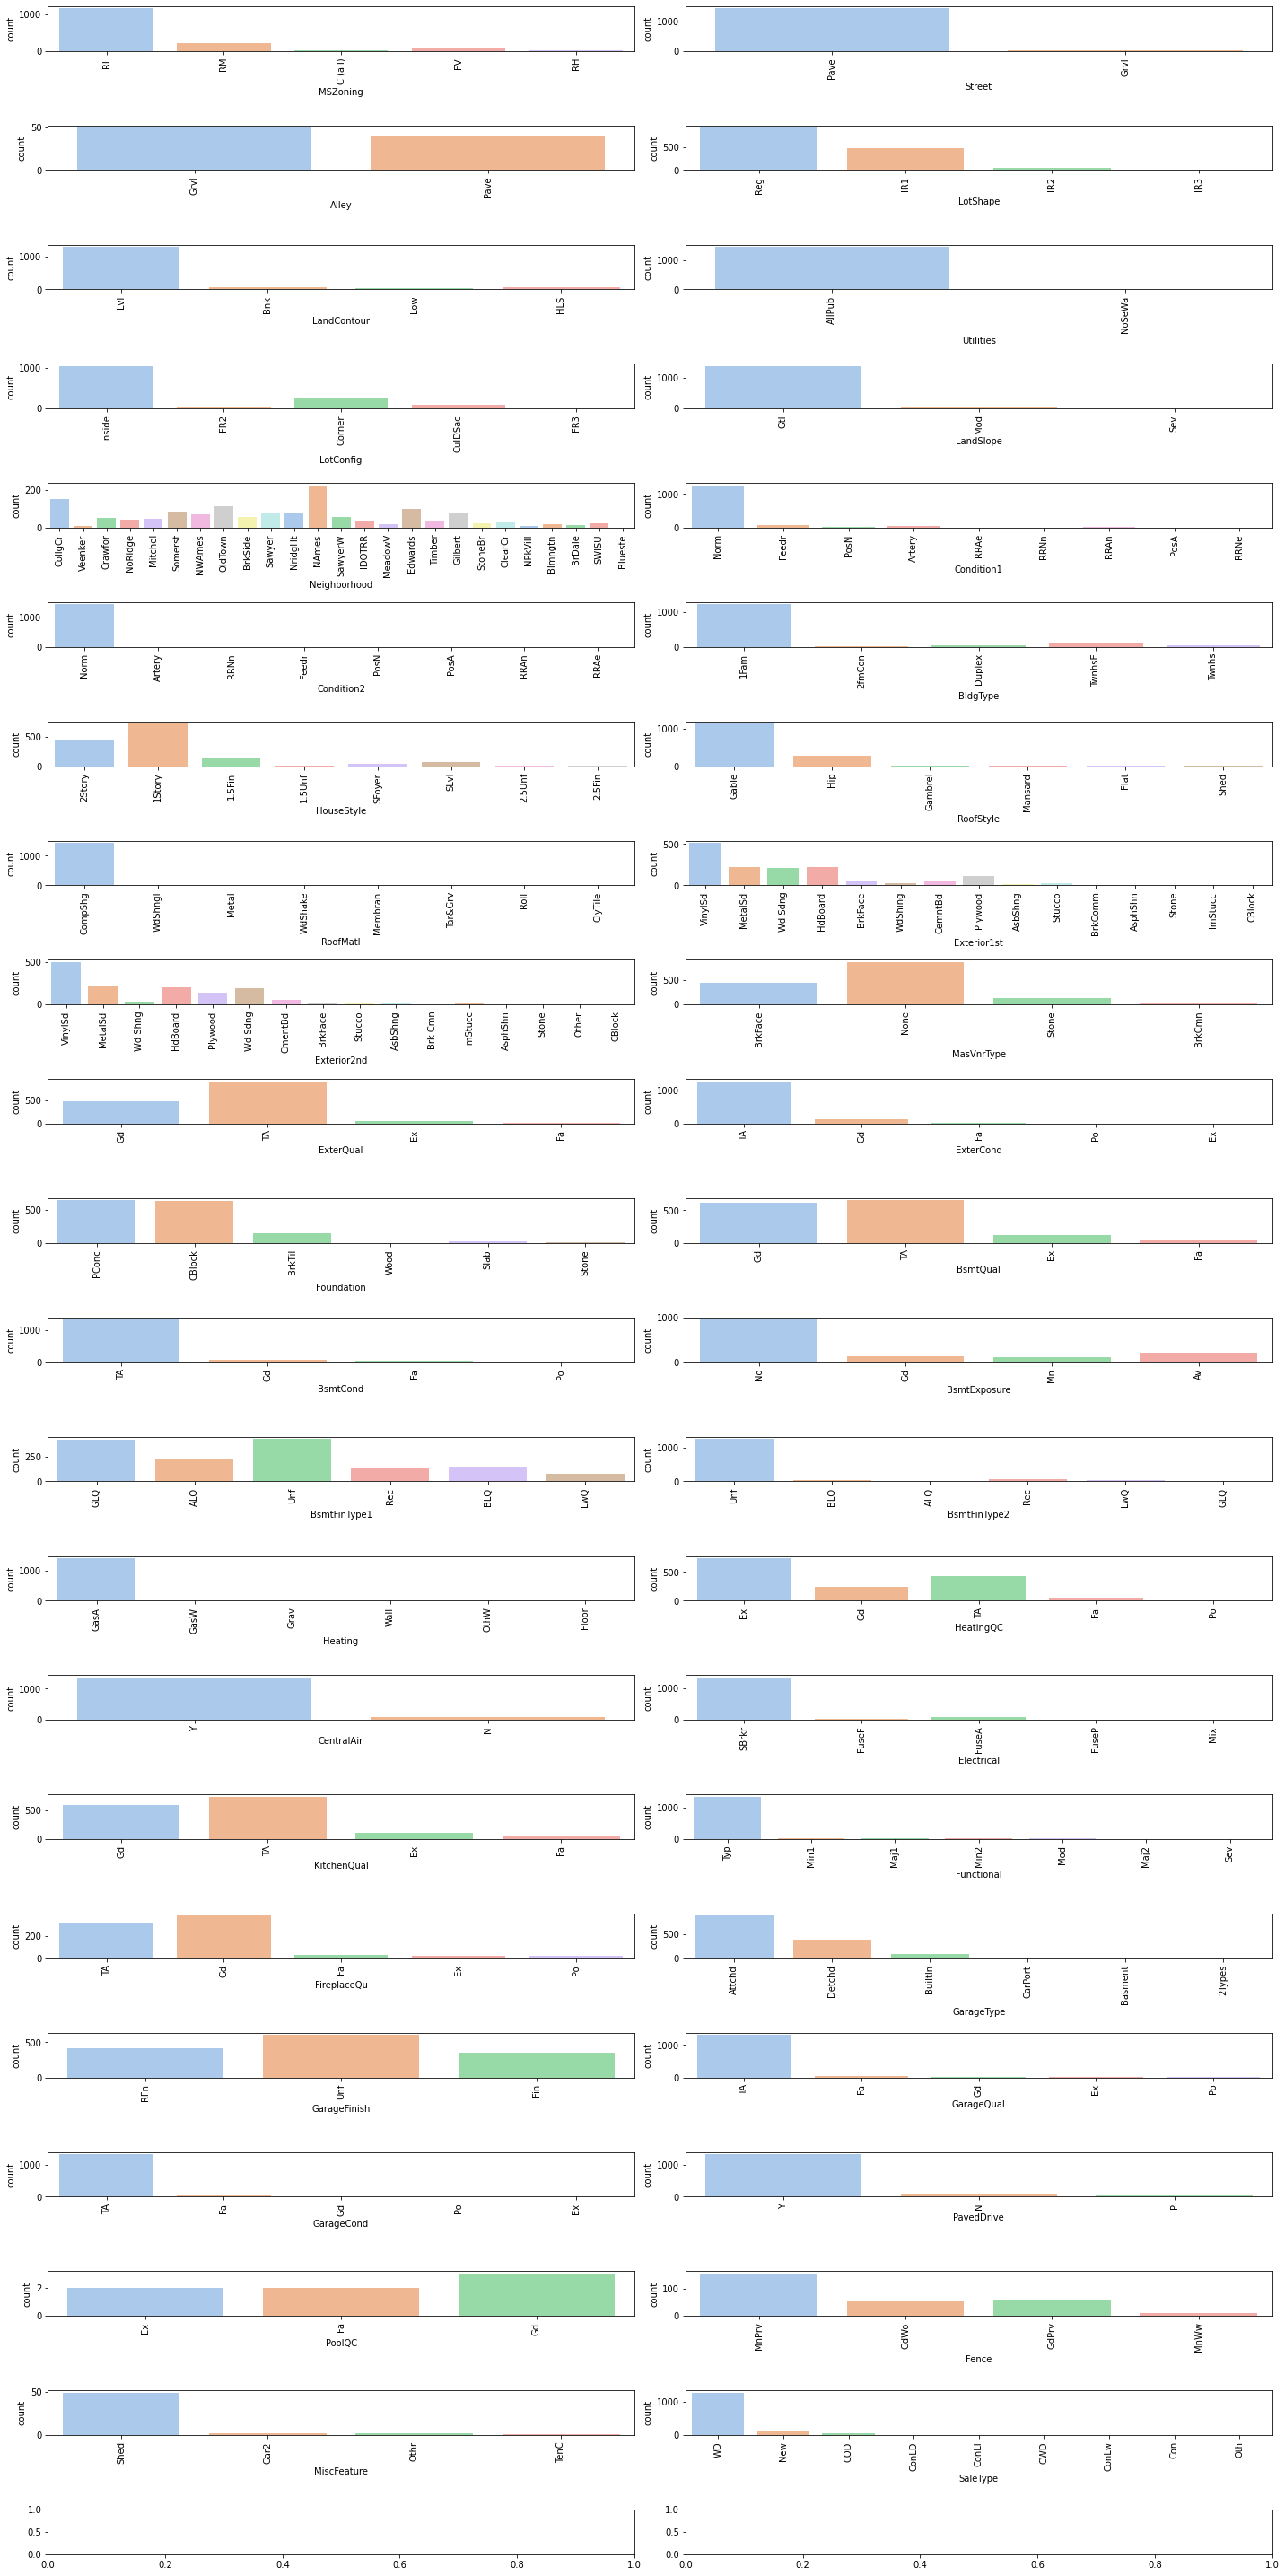

In [6]:
fig, ax = plt.subplots(round(len(train_cat.columns) / 2), 2, figsize=(20, 40))
for i, ax in enumerate(fig.axes):
    if i < len(train_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(data=train_cat, x=train_cat.columns[i], ax=ax, palette='pastel')
        
fig.tight_layout()

Based on the graphs, we can see that some features prevails over other. In this way we can don't use 'Street', 'Utilities', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'DldgType',  'RoofMatl', 'ExterCond', 'BsmtCond, 'BsmtFinType', 'Heating', 'Electrical', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'GarageQual', 'PavedDrive' and 'MiscFeature'

In [7]:
train_cat.drop(['Street', 'Utilities', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',  'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'GarageQual', 'PavedDrive', 'MiscFeature'], axis=1, inplace=True)

Now we must drop features which have too many NaN's.

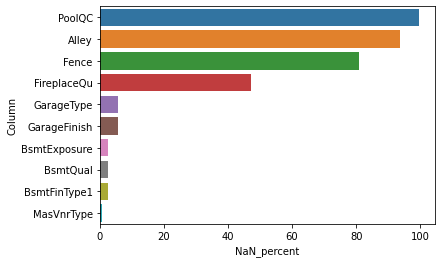

In [8]:
nan_data = train_cat.columns[train_cat.isnull().any()]
nan_counts = pd.DataFrame({
    'Column': nan_data,
    'NaN_percent': [train_cat[col].isnull().sum() * 100 / len(train_cat) for col in nan_data]
})

nan_counts.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=False)
sns.barplot(data=nan_counts, y='Column', x='NaN_percent');

As we can see first four features have too many nan's so we can drop than that don't risk this data in our model.

In [9]:
train_cat.drop(['PoolQC', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

## Hypotheses

* The higher the parameter 'OverallQual', the higher the price of the house

* The higher the parameter 'YearRemodAdd', the higher the price of the house

* In summer and winter the house price is higher

* The lower the parameter 'OverallCond', the lower the price of the house

* The lower the parameter 'EnclosedPorch', the lower the price of the house

# Modeling

In [11]:
categorical_attributes = train_cat.columns
numerical_attributes = train_num.columns

num_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
           ('std_scaler', StandardScaler())]
)

cat_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
           ('encoder', OneHotEncoder(handle_unknown='ignore'))]
)
   
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_attributes),
        ('cat', cat_pipeline, categorical_attributes)
    ]
)

In [12]:
X_train = shuffle(train)

In [13]:
clf = Pipeline(
    steps=[('preprocessing', preprocessor), ('classifier', CatBoostRegressor())]
)

clf.fit(X_train.drop(['SalePrice'], axis=1), X_train['SalePrice'])

Learning rate set to 0.043466
0:	learn: 77232.7334121	total: 61.1ms	remaining: 1m 1s
1:	learn: 75175.9672693	total: 65.1ms	remaining: 32.5s
2:	learn: 73096.9550528	total: 68.5ms	remaining: 22.8s
3:	learn: 71114.6659942	total: 71.9ms	remaining: 17.9s
4:	learn: 69394.8601493	total: 75ms	remaining: 14.9s
5:	learn: 67533.8735138	total: 78.5ms	remaining: 13s
6:	learn: 65703.2948877	total: 81.4ms	remaining: 11.5s
7:	learn: 64045.2512007	total: 84.2ms	remaining: 10.4s
8:	learn: 62421.8140632	total: 87.3ms	remaining: 9.61s
9:	learn: 60863.4464156	total: 90ms	remaining: 8.91s
10:	learn: 59396.1928989	total: 92.5ms	remaining: 8.32s
11:	learn: 58153.2216350	total: 95.3ms	remaining: 7.84s
12:	learn: 56908.9379820	total: 97.7ms	remaining: 7.42s
13:	learn: 55584.2775596	total: 100ms	remaining: 7.05s
14:	learn: 54291.3728003	total: 103ms	remaining: 6.76s
15:	learn: 53107.2369396	total: 106ms	remaining: 6.49s
16:	learn: 51945.2455802	total: 108ms	remaining: 6.25s
17:	learn: 50891.4881184	total: 111ms	

176:	learn: 17514.6848188	total: 576ms	remaining: 2.68s
177:	learn: 17492.8615270	total: 580ms	remaining: 2.68s
178:	learn: 17446.7992705	total: 584ms	remaining: 2.68s
179:	learn: 17422.0170126	total: 588ms	remaining: 2.68s
180:	learn: 17389.2473656	total: 593ms	remaining: 2.68s
181:	learn: 17367.0528576	total: 598ms	remaining: 2.69s
182:	learn: 17338.2151169	total: 602ms	remaining: 2.69s
183:	learn: 17299.3523130	total: 606ms	remaining: 2.69s
184:	learn: 17278.0084755	total: 610ms	remaining: 2.69s
185:	learn: 17254.2184382	total: 614ms	remaining: 2.69s
186:	learn: 17223.3913651	total: 619ms	remaining: 2.69s
187:	learn: 17181.7513869	total: 621ms	remaining: 2.68s
188:	learn: 17151.6465540	total: 624ms	remaining: 2.68s
189:	learn: 17125.7581990	total: 626ms	remaining: 2.67s
190:	learn: 17083.5578318	total: 630ms	remaining: 2.67s
191:	learn: 17046.3817232	total: 634ms	remaining: 2.67s
192:	learn: 17023.2644463	total: 637ms	remaining: 2.66s
193:	learn: 17009.7268118	total: 639ms	remaining

383:	learn: 12635.9034532	total: 1.17s	remaining: 1.87s
384:	learn: 12622.6290460	total: 1.17s	remaining: 1.88s
385:	learn: 12605.9145721	total: 1.18s	remaining: 1.88s
386:	learn: 12581.0298980	total: 1.18s	remaining: 1.88s
387:	learn: 12552.1619429	total: 1.19s	remaining: 1.88s
388:	learn: 12529.6350145	total: 1.2s	remaining: 1.88s
389:	learn: 12510.6554401	total: 1.2s	remaining: 1.88s
390:	learn: 12494.1981393	total: 1.21s	remaining: 1.88s
391:	learn: 12474.0768380	total: 1.21s	remaining: 1.88s
392:	learn: 12451.3335307	total: 1.22s	remaining: 1.89s
393:	learn: 12446.1100950	total: 1.23s	remaining: 1.89s
394:	learn: 12410.9690828	total: 1.23s	remaining: 1.88s
395:	learn: 12392.2139333	total: 1.24s	remaining: 1.89s
396:	learn: 12368.1016327	total: 1.24s	remaining: 1.89s
397:	learn: 12350.4784683	total: 1.25s	remaining: 1.89s
398:	learn: 12324.8174049	total: 1.25s	remaining: 1.89s
399:	learn: 12303.1653786	total: 1.25s	remaining: 1.88s
400:	learn: 12280.7199931	total: 1.26s	remaining: 

535:	learn: 10342.3449642	total: 1.76s	remaining: 1.53s
536:	learn: 10328.9286052	total: 1.78s	remaining: 1.53s
537:	learn: 10312.5750720	total: 1.8s	remaining: 1.55s
538:	learn: 10303.5346557	total: 1.81s	remaining: 1.55s
539:	learn: 10287.3562432	total: 1.82s	remaining: 1.55s
540:	learn: 10270.9096697	total: 1.83s	remaining: 1.55s
541:	learn: 10269.5518975	total: 1.85s	remaining: 1.57s
542:	learn: 10251.3945711	total: 1.87s	remaining: 1.58s
543:	learn: 10242.5949865	total: 1.89s	remaining: 1.58s
544:	learn: 10237.2294641	total: 1.89s	remaining: 1.58s
545:	learn: 10220.7555797	total: 1.9s	remaining: 1.58s
546:	learn: 10210.2721020	total: 1.91s	remaining: 1.58s
547:	learn: 10209.0890476	total: 1.91s	remaining: 1.57s
548:	learn: 10196.1415134	total: 1.92s	remaining: 1.57s
549:	learn: 10185.1387279	total: 1.92s	remaining: 1.57s
550:	learn: 10164.5047826	total: 1.93s	remaining: 1.57s
551:	learn: 10163.4176634	total: 1.93s	remaining: 1.57s
552:	learn: 10147.6698666	total: 1.94s	remaining: 

705:	learn: 8553.2564355	total: 2.75s	remaining: 1.14s
706:	learn: 8544.5259322	total: 2.75s	remaining: 1.14s
707:	learn: 8529.6516647	total: 2.76s	remaining: 1.14s
708:	learn: 8528.8247714	total: 2.77s	remaining: 1.14s
709:	learn: 8517.5197901	total: 2.77s	remaining: 1.13s
710:	learn: 8506.2284997	total: 2.78s	remaining: 1.13s
711:	learn: 8497.6804657	total: 2.78s	remaining: 1.13s
712:	learn: 8483.6265704	total: 2.79s	remaining: 1.12s
713:	learn: 8474.3485663	total: 2.8s	remaining: 1.12s
714:	learn: 8466.5555490	total: 2.81s	remaining: 1.12s
715:	learn: 8457.3830831	total: 2.82s	remaining: 1.12s
716:	learn: 8445.6885574	total: 2.83s	remaining: 1.11s
717:	learn: 8439.6055629	total: 2.83s	remaining: 1.11s
718:	learn: 8430.8804754	total: 2.84s	remaining: 1.11s
719:	learn: 8416.2320276	total: 2.84s	remaining: 1.1s
720:	learn: 8409.7065222	total: 2.85s	remaining: 1.1s
721:	learn: 8402.6543220	total: 2.86s	remaining: 1.1s
722:	learn: 8393.1488244	total: 2.86s	remaining: 1.1s
723:	learn: 837

865:	learn: 7244.9534129	total: 4.21s	remaining: 651ms
866:	learn: 7244.5030095	total: 4.22s	remaining: 647ms
867:	learn: 7233.3081053	total: 4.23s	remaining: 643ms
868:	learn: 7232.7448021	total: 4.23s	remaining: 638ms
869:	learn: 7222.3193275	total: 4.24s	remaining: 634ms
870:	learn: 7219.7987488	total: 4.26s	remaining: 630ms
871:	learn: 7216.2518160	total: 4.26s	remaining: 626ms
872:	learn: 7201.6925388	total: 4.27s	remaining: 622ms
873:	learn: 7191.7956089	total: 4.28s	remaining: 617ms
874:	learn: 7184.1380000	total: 4.29s	remaining: 613ms
875:	learn: 7173.0136978	total: 4.3s	remaining: 609ms
876:	learn: 7166.6619161	total: 4.31s	remaining: 604ms
877:	learn: 7162.7919159	total: 4.32s	remaining: 601ms
878:	learn: 7155.7356196	total: 4.33s	remaining: 596ms
879:	learn: 7145.7326880	total: 4.34s	remaining: 592ms
880:	learn: 7139.9228057	total: 4.34s	remaining: 587ms
881:	learn: 7135.9931910	total: 4.35s	remaining: 583ms
882:	learn: 7126.8631687	total: 4.36s	remaining: 578ms
883:	learn:

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea...
                                                  Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostRegressor object at 0x11f5ffcd0>)])

# Predict Data

In [14]:
predictions = clf.predict(test)

In [15]:
X_test = pd.read_csv('HPAR/test.csv')
prediction = pd.DataFrame(X_test['Id'], columns=['Id'], )
pre = pd.DataFrame(predictions, columns=['SalePrice'])
prediction = pd.concat([prediction, pre], axis=1)
prediction.to_csv('prediction.csv', index=False)